In [1]:
import pandas as pd
import datatable as dt
import numpy as np
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, precision_recall_fscore_support, precision_score, auc, recall_score, roc_auc_score, make_scorer, balanced_accuracy_score, confusion_matrix, ConfusionMatrixDisplay, RocCurveDisplay
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

from xgboost import XGBClassifier
import shap
import robi

import matplotlib.pyplot as plt

In [2]:
path_to_csv = r'/mnt/data/psteinmetz/neotex/CSV/BOUNDING_BOX.csv'
path_to_csv_ville = r'/mnt/data/psteinmetz/neotex/CSV/Bounding_box_ville.csv'

shape_path_to_csv = r'/mnt/data/psteinmetz/neotex/CSV/TUMOUR.csv'
shape_path_to_csv_ville = r'/mnt/data/psteinmetz/neotex/CSV/Tumour_ville.csv'

In [3]:
data_train = pd.concat((dt.fread(path_to_csv).to_pandas(), dt.fread(path_to_csv_ville).to_pandas()), ignore_index=True).dropna(axis=1)
data_train_shape = pd.concat((dt.fread(shape_path_to_csv).to_pandas(), dt.fread(shape_path_to_csv_ville).to_pandas()), ignore_index=True).filter(regex='shape.*40')

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.


In [4]:
data_train.iloc[:, 95:]

,original_shape_Elongation,original_shape_Flatness,original_shape_LeastAxisLength,original_shape_MajorAxisLength,original_shape_Maximum2DDiameterColumn,original_shape_Maximum2DDiameterRow,original_shape_Maximum2DDiameterSlice,original_shape_Maximum3DDiameter,original_shape_MeshVolume,original_shape_MinorAxisLength,...,exponential_glszm_SmallAreaHighGrayLevelEmphasis_T2,exponential_glszm_SmallAreaLowGrayLevelEmphasis_T2,exponential_glszm_ZoneEntropy_T2,exponential_glszm_ZonePercentage_T2,exponential_glszm_ZoneVariance_T2,exponential_ngtdm_Busyness_T2,exponential_ngtdm_Coarseness_T2,exponential_ngtdm_Complexity_T2,exponential_ngtdm_Contrast_T2,exponential_ngtdm_Strength_T2
0,0.968719,0.906154,33.466401,36.932371,41.773197,42.520583,43.863424,52.038447,28722.666667,35.777088,...,1.543529,0.129643,4.657882,0.002132,3.939923e+06,144.830605,0.000750,1.591173,0.006888,0.005311
1,0.939336,0.757317,28.844410,38.087618,40.804412,39.204592,44.598206,50.645829,25531.166667,35.777088,...,2.644837,0.116419,4.532268,0.003801,1.445569e+06,105.154735,0.000887,2.989165,0.006002,0.016243
2,0.912252,0.771849,50.793700,65.807801,71.400280,67.475922,76.485293,87.743946,130340.166667,60.033324,...,2.400859,0.084928,5.031057,0.001727,1.939701e+07,834.281202,0.000120,3.883650,0.006838,0.002547
3,0.660895,0.576105,39.242834,68.117545,51.088159,70.178344,67.601775,77.549984,78168.666667,45.018515,...,1.755783,0.121759,5.149634,0.002674,8.950723e+06,376.366325,0.000288,1.500503,0.006477,0.002091
4,0.909003,0.726975,27.688746,38.087618,40.224371,37.802116,43.931765,49.588305,23717.166667,34.621766,...,2.048350,0.186783,3.588354,0.001738,3.105469e+06,189.092543,0.000559,4.566857,0.010719,0.010887
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131,0.934751,0.934751,49.638695,53.103672,60.108236,62.289646,62.289646,75.126560,84988.666667,49.638695,...,1.240806,0.076254,3.932302,0.000984,2.040513e+07,709.682502,0.000276,0.729310,0.014317,0.000841
132,0.930193,0.604367,30.000000,49.638695,47.169906,58.051701,49.739320,63.206012,44666.166667,46.173586,...,65.094747,0.062979,6.394876,0.024553,4.351425e+05,17.202197,0.000433,298.356831,0.003986,1.469847
133,0.954449,0.817763,20.752510,25.377155,29.732137,27.802878,27.018512,34.249088,8286.166667,24.221203,...,2.803496,0.053186,3.434561,0.005926,2.982394e+05,85.927808,0.001571,2.900978,0.016453,0.013454
134,1.000000,0.918857,39.242834,42.708313,51.623638,49.578221,49.578221,61.269895,46492.666667,42.708313,...,5.830274,0.211471,5.042325,0.008483,1.447597e+06,59.832406,0.000461,18.286376,0.002164,0.091117


In [5]:
X_train_all=data_train.iloc[:, 95:]
X_train_all = pd.concat((data_train_shape, X_train_all[X_train_all.columns.drop(list(X_train_all.filter(regex='shape')))]), axis=1)

In [6]:
X_train_all

,original_shape_Elongation_40.0,original_shape_Flatness_40.0,original_shape_LeastAxisLength_40.0,original_shape_MajorAxisLength_40.0,original_shape_Maximum2DDiameterColumn_40.0,original_shape_Maximum2DDiameterRow_40.0,original_shape_Maximum2DDiameterSlice_40.0,original_shape_Maximum3DDiameter_40.0,original_shape_MeshVolume_40.0,original_shape_MinorAxisLength_40.0,...,exponential_glszm_SmallAreaHighGrayLevelEmphasis_T2,exponential_glszm_SmallAreaLowGrayLevelEmphasis_T2,exponential_glszm_ZoneEntropy_T2,exponential_glszm_ZonePercentage_T2,exponential_glszm_ZoneVariance_T2,exponential_ngtdm_Busyness_T2,exponential_ngtdm_Coarseness_T2,exponential_ngtdm_Complexity_T2,exponential_ngtdm_Contrast_T2,exponential_ngtdm_Strength_T2
0,0.895548,0.565147,14.339323,25.372732,30.016662,30.463092,29.832868,33.481338,5133.958333,22.722487,...,1.543529,0.129643,4.657882,0.002132,3.939923e+06,144.830605,0.000750,1.591173,0.006888,0.005311
1,0.843668,0.564483,15.991587,28.329629,29.068884,28.792360,33.970576,34.583233,6003.208333,23.900801,...,2.644837,0.116419,4.532268,0.003801,1.445569e+06,105.154735,0.000887,2.989165,0.006002,0.016243
2,0.939334,0.641285,25.829186,40.277256,51.971146,50.219518,51.971146,55.659680,14413.583333,37.833794,...,2.400859,0.084928,5.031057,0.001727,1.939701e+07,834.281202,0.000120,3.883650,0.006838,0.002547
3,0.522344,0.408749,19.814428,48.475759,34.669872,54.120237,54.009258,56.160484,9576.583333,25.321014,...,1.755783,0.121759,5.149634,0.002674,8.950723e+06,376.366325,0.000288,1.500503,0.006477,0.002091
4,0.679699,0.523767,13.203994,25.209674,26.925824,23.537205,27.802878,32.449961,3329.541667,17.134995,...,2.048350,0.186783,3.588354,0.001738,3.105469e+06,189.092543,0.000559,4.566857,0.010719,0.010887
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131,0.865601,0.782735,27.982876,35.750147,42.379240,40.816663,45.607017,45.978256,15847.166667,30.945356,...,1.240806,0.076254,3.932302,0.000984,2.040513e+07,709.682502,0.000276,0.729310,0.014317,0.000841
132,0.822901,0.471679,15.817585,33.534608,38.470768,38.078866,35.128336,39.038443,7445.791667,27.595655,...,65.094747,0.062979,6.394876,0.024553,4.351425e+05,17.202197,0.000433,298.356831,0.003986,1.469847
133,0.938200,0.619726,10.551958,17.026814,20.124612,19.697716,18.357560,22.516660,1438.375000,15.974557,...,2.803496,0.053186,3.434561,0.005926,2.982394e+05,85.927808,0.001571,2.900978,0.016453,0.013454
134,0.811188,0.773946,26.558026,34.315082,37.483330,33.837849,35.355339,41.315857,11638.958333,27.835996,...,5.830274,0.211471,5.042325,0.008483,1.447597e+06,59.832406,0.000461,18.286376,0.002164,0.091117


In [7]:
X_train_all.dtypes.value_counts()

float64    2618
Name: count, dtype: int64

In [9]:
shape_target_train = data_train[['Shape.1']]
margins_target_train = data_train[['Margins (MR)']]

margins_target_train.loc[margins_target_train['Margins (MR)']== 'Circunscribed'] = 'Circumscribed'


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [10]:
label_encoder_margins = LabelEncoder()
margins_target_train['Margins (MR)']= label_encoder_margins.fit_transform(margins_target_train['Margins (MR)']) 


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [11]:
label_encoder_shape = LabelEncoder()
shape_target_train['Shape.1']= label_encoder_shape.fit_transform(shape_target_train['Shape.1']) 


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [12]:
margins_target_train.loc[margins_target_train['Margins (MR)']==1, 'Margins (MR)'] = 0
margins_target_train.loc[margins_target_train['Margins (MR)']==2, 'Margins (MR)'] = 1

shape_target_train.loc[shape_target_train['Shape.1']==2, 'Shape.1'] = 1


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [13]:
skf = StratifiedKFold(n_splits=5, random_state=123, shuffle=True)

In [14]:
rs = 123

# Grid search hyperparameters for a random forest model

def grid_search_rf(X_train, y_train, kfolds):

    params_grid = {
            'max_depth': [2, 5, 10, 15, 20],
            'n_estimators': [5, 50, 100, 150, 200, 1000],
            'min_samples_split': [2, 5, 10, 15, 20],
            'max_features' : ['sqrt', 'log2', None],
            'class_weight': [None, {0:0.05, 1:0.95}, {0:0.1, 1:0.9}, {0:0.2, 1:0.8}, {0:0.3, 1:0.7}, {0:0.4, 1:0.6}, {0:0.5, 1:0.5}]

    }

    rf_model = RandomForestClassifier(random_state=rs)
    grid_search = GridSearchCV(estimator = rf_model,
                               param_grid = params_grid,
                               scoring='f1',
                               cv = kfolds.split(X_train, y_train),
                               n_jobs=50,
                               verbose=True)

    grid_search.fit(X_train, y_train)
    best_params = grid_search.best_params_

    return best_params, grid_search

    
def return_kfold_score(model, to_fit, target, metric, kfolds, name=None):
    if metric == 'youden_index':
        score = round((cross_val_score(model, to_fit, target, scoring=make_scorer(recall_score), cv=kfolds) + cross_val_score(model, to_fit, target, scoring=make_scorer(recall_score,pos_label=0), cv=kfolds) -1).mean(), 2)
        std = round((cross_val_score(model, to_fit, target, scoring=make_scorer(recall_score), cv=kfolds) + cross_val_score(model, to_fit, target, scoring=make_scorer(recall_score,pos_label=0), cv=kfolds) -1).std(), 2)
    else:
        score = round(cross_val_score(model, to_fit, target, scoring=metric, cv=kfolds).mean(), 2)
        std = round(cross_val_score(model, to_fit, target, scoring=metric, cv=kfolds).std(), 2)

    return score, std

In [15]:
best_params_rf_all_shape, grid_search_randomforest_all_shape = grid_search_rf(X_train_all, shape_target_train.values.ravel(), skf)
best_params_rf_all_margins, grid_search_randomforest_all_margins = grid_search_rf(X_train_all, margins_target_train.values.ravel(), skf)

Fitting 5 folds for each of 3150 candidates, totalling 15750 fits
Fitting 5 folds for each of 3150 candidates, totalling 15750 fits


In [16]:
def compile_results(model, X, y, kfolds, return_bool=None):
    
    auc, auc_std = return_kfold_score(model, X, y, 'roc_auc', kfolds)
    balanced_accuracy, balanced_accuracy_std = return_kfold_score(model, X, y, 'balanced_accuracy', kfolds)
    precision, precision_std = return_kfold_score(model, X, y, 'precision', kfolds)
    recall, recall_std = return_kfold_score(model, X, y, 'recall', kfolds)
    f1, f1_std = return_kfold_score(model, X, y, 'f1', kfolds)

    scoring = {
        'sensitivity': make_scorer(recall_score),
        'specificity': make_scorer(recall_score,pos_label=0)
    }
    specificity, specificity_std = return_kfold_score(model, X, y, scoring['specificity'], kfolds, 'specificity')
    sensitivity, sensitivity_std = return_kfold_score(model, X, y, scoring['sensitivity'], kfolds, 'sensitivity')
    youden_index , youden_index_std = return_kfold_score(model, X, y, 'youden_index', kfolds, 'youden_index')

    if return_bool is None:
        for x in [('auc', auc, auc_std), ('balanced_acc', balanced_accuracy, balanced_accuracy_std), ('precision', precision, precision_std), ('recall', recall, recall_std), ('f1', f1, f1_std), ('specificity', specificity, specificity_std), ('sensitivity', sensitivity, sensitivity_std), ('youden_index', youden_index, youden_index_std)]:       
            print(str(x[0]) + ' ' + str(str(x[1])) + ' +/- ' + str(x[2]))

    if return_bool:

        return [(auc, auc_std), (balanced_accuracy, balanced_accuracy_std), (precision, precision_std), (recall, recall_std), (f1, f1_std), (specificity, specificity_std), (sensitivity, sensitivity_std), (youden_index, youden_index_std)]

Text(0.5, 1.0, 'Visualizing Feature Importances')

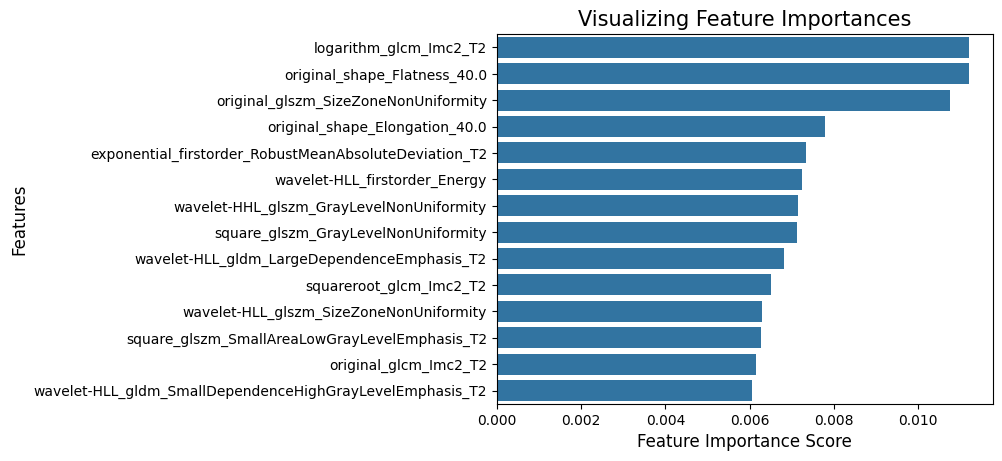

In [17]:
feature_imp_shape = pd.Series(grid_search_randomforest_all_shape.best_estimator_.feature_importances_, index=X_train_all.columns).sort_values(ascending=False)
sns.barplot(x=feature_imp_shape[:14], y=feature_imp_shape[:14].index)
plt.xlabel('Feature Importance Score', fontsize=12)
plt.ylabel('Features', fontsize=12)
plt.title("Visualizing Feature Importances", fontsize=15)

Text(0.5, 1.0, 'Visualizing Feature Importances')

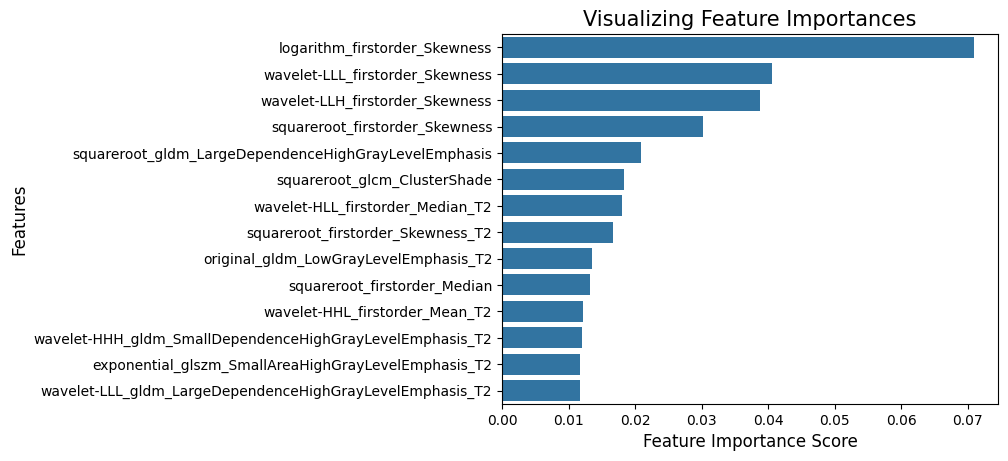

In [18]:
feature_imp_margins = pd.Series(grid_search_randomforest_all_margins.best_estimator_.feature_importances_, index=X_train_all.columns).sort_values(ascending=False)
sns.barplot(x=feature_imp_margins[:14], y=feature_imp_margins[:14].index)
plt.xlabel('Feature Importance Score', fontsize=12)
plt.ylabel('Features', fontsize=12)
plt.title("Visualizing Feature Importances", fontsize=15)

In [39]:
val_rf_shape = feature_imp_shape.sort_values(ascending=False)
val_rf_margins = feature_imp_margins.sort_values(ascending=False)

best_params_rf_restricted_nb_of_features_shape, grid_search_rf_restricted_nb_of_features_shape = grid_search_rf(X_train_all[val_rf_shape.keys()[:15]], shape_target_train.values.ravel(), skf)
best_params_rf_restricted_nb_of_features_margins, grid_search_rf_restricted_nb_of_features_margins = grid_search_rf(X_train_all[val_rf_margins.keys()[:10]], margins_target_train.values.ravel(), skf)

Fitting 5 folds for each of 3150 candidates, totalling 15750 fits


In [40]:
def retrain_cv_for_roc_curve_display(model, X, y, kfolds):
    
    tprs = []
    aucs = []
    mean_fpr = np.linspace(0, 1, 100)

    fig, ax = plt.subplots()
    for i, (train, test) in enumerate(kfolds.split(X, y)):
        print(np.array(y)[train].shape)
        model.fit(np.array(X)[train], np.array(y)[train])
        viz = RocCurveDisplay.from_estimator(
            model,
            np.array(X)[test],
            np.array(y)[test],
            name="ROC fold {}".format(i),
            alpha=0.3,
            lw=1,
            ax=ax,
        )
        interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
        interp_tpr[0] = 0.0
        tprs.append(interp_tpr)
        aucs.append(viz.roc_auc)

    ax.plot([0, 1], [0, 1], linestyle="--", lw=2, color="r", label="Chance", alpha=0.8)

    mean_tpr = np.mean(tprs, axis=0)
    mean_tpr[-1] = 1.0
    mean_auc = auc(mean_fpr, mean_tpr)
    std_auc = np.std(aucs)
    ax.plot(
        mean_fpr,
        mean_tpr,
        color="b",
        label=r"Mean ROC (AUC = %0.2f $\pm$ %0.2f)" % (mean_auc, std_auc),
        lw=2,
        alpha=0.8,
    )

    std_tpr = np.std(tprs, axis=0)
    tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
    tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
    ax.fill_between(
        mean_fpr,
        tprs_lower,
        tprs_upper,
        color="grey",
        alpha=0.2,
        label=r"$\pm$ 1 std. dev.",
    )

    ax.set(
        xlim=[-0.05, 1.05],
        ylim=[-0.05, 1.05],
        title="Receiver operating characteristic example",
    )
    ax.legend(loc="lower right")
    plt.show()

(108, 1)
(109, 1)
(109, 1)
(109, 1)
(109, 1)


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


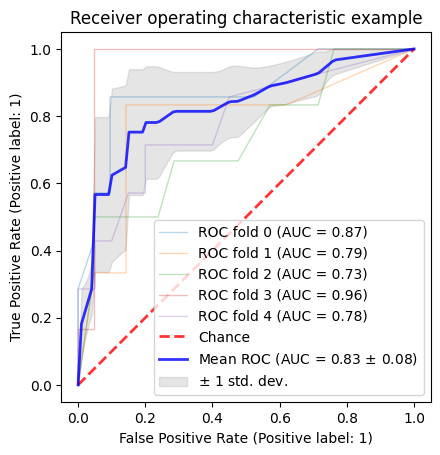

In [41]:
retrain_cv_for_roc_curve_display(grid_search_rf_restricted_nb_of_features_shape.best_estimator_, X_train_all[val_rf_shape.keys()[:15]], shape_target_train.values, skf)

(108, 1)
(109, 1)
(109, 1)
(109, 1)
(109, 1)


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


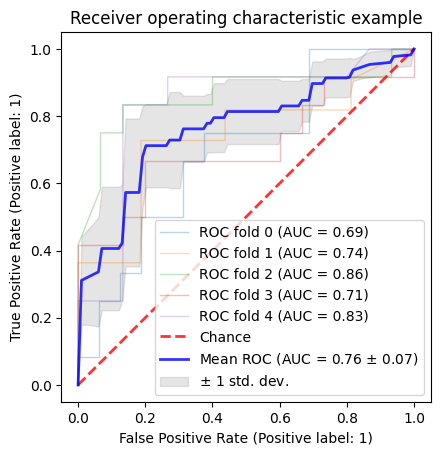

In [34]:
retrain_cv_for_roc_curve_display(grid_search_rf_restricted_nb_of_features_margins.best_estimator_, X_train_all[val_rf_margins.keys()[:10]], margins_target_train.values, skf)

In [42]:
comp_results = [compile_results(x, X_train_all[val_rf_shape.keys()[:15]], shape_target_train.values.ravel(), skf, True) for x in [grid_search_rf_restricted_nb_of_features_shape.best_estimator_]]
results_shape = pd.DataFrame(comp_results, index=['Random Forest bb 15 features'], columns=['roc_auc', 'balanced_accuracy', 'precision', 'recall', 'f1', 'specificity', 'sensitivity', 'youden_index']).T

In [36]:
comp_results = [compile_results(x, X_train_all[val_rf_margins.keys()[:10]], margins_target_train.values.ravel(), skf, True) for x in [grid_search_rf_restricted_nb_of_features_margins.best_estimator_]]
results_margins = pd.DataFrame(comp_results, index=['Random Forest bb 10 features'], columns=['roc_auc', 'balanced_accuracy', 'precision', 'recall', 'f1', 'specificity', 'sensitivity', 'youden_index']).T

In [43]:
results_shape

,Random Forest bb 15 features
roc_auc,"(0.83, 0.08)"
balanced_accuracy,"(0.79, 0.11)"
precision,"(0.69, 0.16)"
recall,"(0.7, 0.2)"
f1,"(0.67, 0.15)"
specificity,"(0.89, 0.09)"
sensitivity,"(0.7, 0.2)"
youden_index,"(0.59, 0.22)"


In [38]:
results_margins

,Random Forest bb 10 features
roc_auc,"(0.77, 0.07)"
balanced_accuracy,"(0.74, 0.08)"
precision,"(0.69, 0.12)"
recall,"(0.76, 0.06)"
f1,"(0.72, 0.09)"
specificity,"(0.72, 0.13)"
sensitivity,"(0.76, 0.06)"
youden_index,"(0.48, 0.17)"
